## 3.1.1 신경망의 예  
입력층, 은닉층, 출력층으로 구성됨.
ex) y=b+w1*x1+w2*x2 값이 0이하면 0, 0초과이면 1로 분류  
b=편향을 나타내는 매개변수, 뉴런이 얼마나 쉽게 활성화되느냐를 제어한다.  
w1,w2는 각 신호의 가중치를 나타내는 매개변수로 각 신호의 영향력을 제어한다.

## 3.1.2 퍼셉트론 복습

위와 같은 예제에서 가중치가 b이고 입력이 1인 뉴런이 추가되었을때, x1,x2,1이라는 3개 신호가 뉴런에 입력됨  
각 신호에 가중치를 곱한 후, 다음 뉴런에 전달된다.  
다음 뉴런에서는 이 신호들의 값을 더하여 그 합이 0을 넘으면 1출력, 그렇지 않으면 0출력.

## 3.1.3 활성화함수의 등장  
활성화함수: 입력신호의 총합을 출력신호로 변환하는 함수  
a=b+w1*x1+w2*x2  
1,x1,x2는 입력노드,b는 가중치,a는 은닉노드,h()활성화함수를 통해 y라는 출력노드 생성됨  

## 3.2.1 활성화함수(시그모이드 함수)

In [ ]:
import math
def h(x):
    return 1/(1+math.exp(-x))
h(2.0)

0.8807970779778823

신경망에서는 활성화함수로 시그모이드 함수를 이용하여 신호를 변환하고 그 변환된 신호를 다음 뉴런에 전달한다.

## 3.2.2 계단함수 구현하기

In [ ]:
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

In [ ]:
import numpy as np
def step_function(x):
  y=x>0
  return y.astype(np.int)

In [ ]:
import numpy as np
x=np.array([-1.0,1.0,2.0])
x

array([-1.,  1.,  2.])

In [ ]:
y=x>0#넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool배열이 생성됨
y

array([False,  True,  True])

In [ ]:
y=y.astype(int)#astype():넘파이 배열의 자료형을 변환
y

array([0, 1, 1])

## 3.2.3 계단함수 그래프

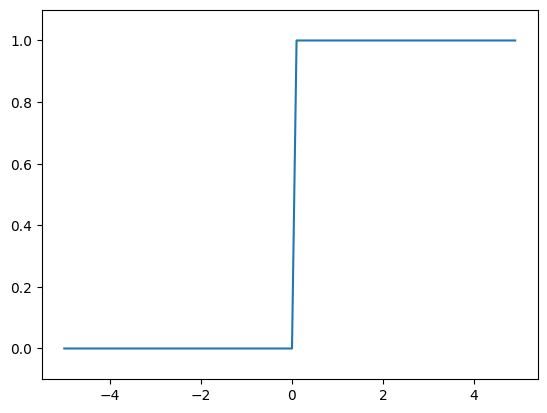

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def step_function(x):#인수로 받은 넘파이 배열의 원소각각을 인수로 계단함수를 실행하여 결과를 다시 배열로 되돌려줌
  return np.array(x>0,dtype=int)
x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

## 3.2.4 시그모이드 함수 구현하기

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
x=np.array([-1.0,1.0,2.0])#브로드캐스트:넘파이배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행함
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [ ]:
t=np.array([1.0,2.0,3.0])
1.0+t

array([2., 3., 4.])

In [ ]:
1.0/t

array([1.        , 0.5       , 0.33333333])

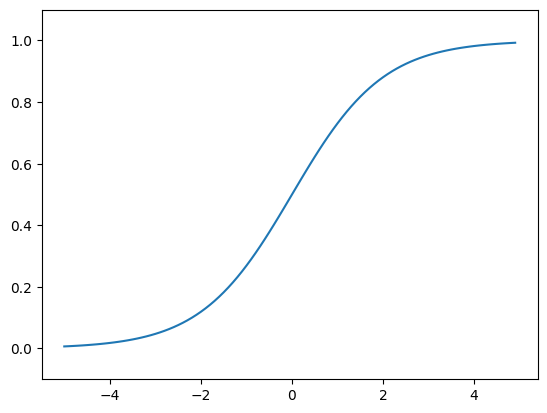

In [ ]:
x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

시그모이드와 계단함수의 차이:시그모이드는 실수값 반환, 계단함수는 0 또는 1값 중 하나이다.  
공통점: 출력이 0~1사이이다.

## 3.2.6 비선형 함수
시그모이드 함수는 곡선, 계단함수는 구부러진 직선 모양의 비선형 함수이다.

## 3.2.7 ReLU함수  
relu함수는 입력이 0을 넘으면 입력을 그대로 출력하고, 0이하이면 0을 출력하는 함수이다.

In [ ]:
def relu(x):
    return np.maximum(0,x)

## 3.3.1 다차원 배열
숫자의 집합을 배열이라고 한다.  
N차원으로 확장한 배열=다차원 배열

In [ ]:
import numpy as np
A=np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [ ]:
np.ndim(A)#배열의 차원

1

In [ ]:
A.shape#배열 요소4개

(4,)

In [ ]:
A.shape[0]#배열shape에서 0번째 인덱스인 4

4

In [ ]:
B=np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
np.ndim(B)#2차원 배열-행렬

2

In [ ]:
B.shape#(3,2)

(3, 2)

## 3.3.2 행렬의 곱
np.dot은 입력이 1차원 배열이면 벡터, 2차원 배열이면 행렬곱 계산

In [ ]:
A=np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [ ]:
B=np.array([[5,6],[7,8]])
B.shape#(2,2)

(2, 2)

In [ ]:
np.dot(A,B)#내적 ex(1*5+2*7=19)

array([[19, 22],
       [43, 50]])

np.dot(A,B)와 np.dot(B,A)는 다른 값이 될 수 있음  
cf)행렬의 곱은 행렬의 shape형상을 주의한다. 정확히는 행렬 A의 열의 수,행렬 B의 행의 수가 같아야 한다.  
cf)다차원 배열을 곱하려면, 두 행렬의 대응하는 차원의 원소 수를 일치시켜야 한다.

In [ ]:
A=np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [ ]:
B=np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [ ]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [ ]:
C=np.array([[1,2],[3,4]])
C.shape

(2, 2)

In [ ]:
A.shape

(2, 3)

In [ ]:
np.dot(A,C)#잘못된 예시! 차원의 원소 수를 일치시켜야 한다!

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [ ]:
A=np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [ ]:
B=np.array([7,8])
B.shape

(2,)

In [ ]:
np.dot(A,B)

array([23, 53, 83])

## 3.3.3 신경망에서의 행렬 곱

In [ ]:
X=np.array([1,2])
X.shape

(2,)

In [ ]:
W=np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [ ]:
W.shape

(2, 3)

In [ ]:
Y=np.dot(X,W)
print(Y)

[ 5 11 17]


## 3.4 3층 신경망 구현하기
3층 신경망에서 수행되는 순방향 처리 구현  
가정)입력층(0층)2개, 첫번째 은닉층(1층)은 3개, 두번째 은닉층(2층)은 2개, 출력층(3층)은 2개의 뉴런으로 구성된다.  
cf)가중치의 오른쪽 아래 두 숫자는 차례로 다음 층 뉴런과 앞 층 뉴런의 인덱스 번호이다.

## 3.4.2 각 층의 신호전달 구현하기

In [ ]:
X=np.array([1.0,0.5])
W1=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1=np.array([0.1,0.2,0.3])
print(W1.shape)#(2,3)
print(X.shape)#(2,)
print(B1.shape)#(3,)
A1=np.dot(X,W1)+B1

(2, 3)
(2,)
(3,)


In [ ]:
Z1=sigmoid(A1)#입력층에서 1층 은닉층의 첫번째 노드를 거친 신호값을 활성화함수에 넣기
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


은닉층에서의 가중치 합(가중신호와 편향의 총합)을 a로 표기->활성화함수h()로 변환된 신호를 z로 표기

#### 입력층에서 첫번째 은닉층의 첫번째 노드에서 두번째 은닉층까지의 신호전달(1층에서 2층으로 신호전달과정)

In [ ]:
W2=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2=np.array([0.1,0.2])#bias
print(Z1.shape)
print(W2.shape)
print(B2.shape)
A2=np.dot(Z1,W2)+B2
Z2=sigmoid(A2)

(3,)
(3, 2)
(2,)


#### 2층에서 출력층으로의 신호전달

In [ ]:
def identity_function(x):
    return x
W3=np.array([[0.1,0.3],[0.2,0.4]])
B3=np.array([0.1,0.2])
A3=np.dot(Z2,W3)+B3
Y=identity_function(A3)#Y=A3와 동일
print(Y)

[0.31682708 0.69627909]


## 3.4.3 구현정리

In [ ]:
def init_network():
  network={}
  network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['b1']=np.array([0.1,0.2,0.3])
  network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['b2']=np.array([0.1,0.2])
  network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
  network['b3']=np.array([0.1,0.2])
  return network

In [ ]:
#첫번째 은닉층,두번째 은닉층 거쳐서 최종 출력얻기(출력층)-순방향
def forward(network,x):
    W1,W2,W3=network['W1'],network['W2'],network['W3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    y=identity_function(a3)
    return y

In [ ]:
network=init_network()
x=np.array([1.0,0.5])
y=forward(network,x)
print(y)

[0.31682708 0.69627909]


## 3.5.1 항등함수와 소프트맥스 함수 구현하기
소프트맥스 함수에서의 표기  
n:출력층의 뉴런 수  
Yk:k번째 출력    
소프트맥스 함수의 분자:입력신호ak의 지수함수  
소프트맥스 함수의 분모:모든 입력신호의 지수함수의 합    
cf)회귀:항등함수 분류:소프트맥스 자주 사용

In [ ]:
a=np.array([0.3,2.9,4.0])
exp_a=np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [ ]:
sum_exp_a=np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [ ]:
y=exp_a/sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [ ]:
#실제로 소프트맥스 함수의 각 확률의 합이 1인지 확인?
hap=np.sum(y)
print(hap)

1.0


In [ ]:
def softmax(a):
  exp_a=np.exp(a)
  sum_exp_a=np.sum(exp_a)
  y=exp_a/sum_exp_a
  return y

## 3.5.2 소프트맥스 함수 구현시 주의점  
overflow문제 발생:소프트맥스 함수는 지수함수를 사용하는데, 지수함수는 큰 값을 냄.ex)e**10은 20000이 넘고 e**1000은 무한대이므로 결과수치가 불안정

In [ ]:
a=np.array([1010,1000,990])
np.exp(a)/np.sum(np.exp(a))#소프트맥스 함수의 계산->제대로 계산되지 않음

<ipython-input-48-f66edc432f09>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a)/np.sum(np.exp(a))#소프트맥스 함수의 계산->제대로 계산되지 않음
<ipython-input-48-f66edc432f09>:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a)/np.sum(np.exp(a))#소프트맥스 함수의 계산->제대로 계산되지 않음


array([nan, nan, nan])

In [ ]:
c=np.max(a)
a-c#입력신호 중 최댓값 빼주기

array([  0, -10, -20])

In [ ]:
np.exp(a-c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [ ]:
def softmax(a):
    c=np.max(a)
    exp_a=np.exp(a-c)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y

## 3.5.3 소프트맥스 함수의 특징  
- 출력의 총합이 1이다  
- 소프트맥스 함수의 출력을 '확률'로 해석가능  
cf) 소프트맥스 함수를 적용해도 각 원소의 대소관계는 변하지 않는다. 즉 신경망 분류시 출력층의 소프트맥스함수를 생략가능

In [ ]:
a=np.array([0.3,2.9,4.0])
y=softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [ ]:
np.sum(y)

1.0

## 3.5.4출력층의 뉴런 수 정하기
클래스의 개수=분류의 개수로 설정하는 것이 일반적

## 3.6.1 MNIST데이터셋
손글씨 숫자 이미지 집합

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import sys
import os
sys.path.append( '/content/drive/MyDrive/deeplearning/deep-learning-from-scratch-master/')

import numpy as np
from dataset.mnist import load_mnist  # MNIST 모듈 불러오기
from PIL import Image  # PIL 라이브러리 불러오기

In [ ]:
def img_show(img):
    pil_img=Image.fromarray(np.uint8(img))
    pil_img.show()
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)
img=x_train[0]
label=t_train[0]
print(label)
print(img.shape)
img=img.reshape(28,28)
print(img.shape)
img_show(img)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
5
(784,)
(28, 28)


reshape메소드에 원하는 형상을 인수로 지정시, 넘파이 배열 형상 바꾸기 가능  
넘파이로 저장된 이미지 데이터를 PIL용 데이터객체로 변환해야 하며,Image.fromarray()가 이를 수행

## 3.6.2신경망의 추론 처리
정규화: 데이터를 특정범위로 변환하는 처리  
전처리:신경망의 입력데이터에 특정변환을 가하는 것

In [ ]:
import pickle
def get_data():
  (x_train,t_train),(x_test,t_test)=\
    load_mnist(normalize=True,flatten=True,one_hot_label=False)
  return x_test,t_test
def init_network():
    with open("/content/drive/MyDrive/deeplearning/deep-learning-from-scratch-master/ch03/sample_weight.pkl", 'rb') as f:
        # 학습된 가중치 매개변수가 담긴 파일
        # 학습 없이 바로 추론을 수행
        network = pickle.load(f)
    return network

def predict(network, x):#predict함수는 각 레이블 확률을 넘파이 배열로 반환한다.
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

x, t = get_data()
network = init_network()
accuracy_cnt = 0

'''
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352
'''
#배치처리(3.6.3)
batch_size = 100
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)#1번째 차원을 구성하는 각 원소에서 축으로 최댓값의 인덱스를 갖도록 한것
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## 3.6.3 배치처리
batch(배치):하나로 묶은 입력데이터들->ex)이미지 1장당 처리시간을 대폭 줄여주는 효과가 있음